# Logistic regression

In [25]:
import numpy as np
import pandas as pd
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from matplotlib import pyplot as plt

from utils import DataHandlerTitantic

Load the data and split into train and validation sets.

In [114]:
dh = DataHandlerTitantic(34545234)
dh.load_data("data/train.csv", "data/test.csv")
dh.shuffle_split(0.7)
dh.full_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Gender and socio-economic status

Convert the 'Sex' column into an integer one, and replace 'Pclass' with a categorical one.

In [115]:
dh1 = dh.to_is_female().make_dummies(["Pclass"])
dh1.train.head()

,PassengerId,Survived,Name,IsFemale,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Pclass_1,Pclass_2,Pclass_3
763,764,1,"Carter, Mrs. William Ernest (Lucile Polk)",1,36.0,1,2,113760,120.000,B96 B98,S,1,0,0
632,633,1,"Stahelin-Maeglin, Dr. Max",0,32.0,0,0,13214,30.500,B50,C,1,0,0
237,238,1,"Collyer, Miss. Marjorie ""Lottie""",1,8.0,0,2,C.A. 31921,26.250,NaN,S,0,1,0
491,492,0,"Windelov, Mr. Einar",0,21.0,0,0,SOTON/OQ 3101317,7.250,NaN,S,0,0,1
590,591,0,"Rintamaki, Mr. Matti",0,35.0,0,0,STON/O 2. 3101273,7.125,NaN,S,0,0,1


In [116]:
features1 = ["IsFemale", "Pclass_1", "Pclass_2", "Pclass_3"]
X = dh1.train[features1]
y = dh1.train["Survived"]

Specify the model. We normalise the data and then apply logistic regression.

In [117]:
model1 = make_pipeline(StandardScaler(), 
                       LogisticRegression(solver="liblinear"))
print(model1)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(solver='liblinear'))])


Use cross validation to pick the best value for the `C` parameter.

In [118]:
power_range = np.arange(-5,5)
tuned_parameters = [{"logisticregression__C": np.power(10.0, power_range)}]

clf = GridSearchCV(model1, tuned_parameters)
clf.fit(X, y)

results = pd.DataFrame(clf.cv_results_)

print("Best parameters:")
print()
print(clf.best_params_)
print()

results

Best parameters:

{'logisticregression__C': 0.001}



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logisticregression__C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004412,0.000568,0.001766,0.000073,0.00001,{'logisticregression__C': 1e-05},0.728,0.744,0.736,0.822581,0.766129,0.759342,0.034081,2
1,0.004006,0.000019,0.001750,0.000081,0.0001,{'logisticregression__C': 0.0001},0.728,0.744,0.736,0.822581,0.766129,0.759342,0.034081,2
2,0.004177,0.000140,0.001713,0.000070,0.001,{'logisticregression__C': 0.001},0.728,0.744,0.768,0.822581,0.782258,0.768968,0.032722,1
3,0.004425,0.000723,0.001694,0.000020,0.01,{'logisticregression__C': 0.01},0.728,0.744,0.768,0.758065,0.782258,0.756065,0.018792,4
4,0.004392,0.000327,0.001751,0.000043,0.1,{'logisticregression__C': 0.1},0.728,0.744,0.760,0.758065,0.782258,0.754465,0.018033,5
5,0.004442,0.000131,0.001871,0.000144,1.0,{'logisticregression__C': 1.0},0.728,0.744,0.760,0.758065,0.782258,0.754465,0.018033,5
6,0.004299,0.000174,0.001753,0.000082,10.0,{'logisticregression__C': 10.0},0.728,0.744,0.760,0.758065,0.782258,0.754465,0.018033,5
7,0.004926,0.000194,0.002015,0.000222,100.0,{'logisticregression__C': 100.0},0.728,0.744,0.760,0.758065,0.782258,0.754465,0.018033,5
8,0.004338,0.000114,0.001892,0.000241,1000.0,{'logisticregression__C': 1000.0},0.728,0.744,0.760,0.758065,0.782258,0.754465,0.018033,5
9,0.004191,0.000047,0.001689,0.000012,10000.0,{'logisticregression__C': 10000.0},0.728,0.744,0.760,0.758065,0.782258,0.754465,0.018033,5


Plot the mean test scores against the log of the `C` value.

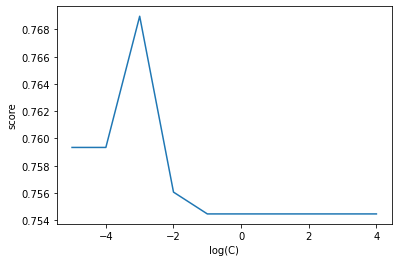

In [119]:
fig, ax = plt.subplots()
ax.plot(power_range, results["mean_test_score"])
ax.set_xlabel("log(C)")
ax.set_ylabel("score")
plt.show()

Set the `C` parameter which gives the best score.

In [120]:
model1.set_params(**clf.best_params_)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.001, solver='liblinear'))])

Train the model on the training data and give the final training and evaluation scores.

In [121]:
model1.fit(X, y)

X_eval = dh1.eval[features1]
y_eval = dh1.eval["Survived"]

score_train = model1.score(X, y)
score_eval = model1.score(X_eval, y_eval)

print(f"Training score: {score_train:%}")
print(f"Evaluation score: {score_eval:%}")

Training score: 76.886035%
Evaluation score: 70.895522%


## Missing age values

Impute the missing values in the 'Age' column using k-nearest neighbours.

In [122]:
columns = ["Pclass_1", "Pclass_2", "Pclass_3", "IsFemale", "Age", "SibSp", "Parch", "Fare"]
dh2 = dh1.impute_values(columns, strategy="knn")

## Including age

Let's get an idea of how survival depends age. First for all data at once.

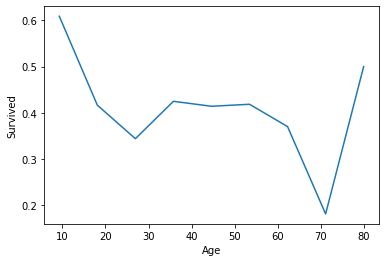

In [123]:
num_age_groups = 10
age_min = dh.train["Age"].min()
age_max = dh.train["Age"].max()
age_boundaries = np.linspace(age_min, age_max, num_age_groups)

binned = pd.cut(dh.train["Age"], age_boundaries)
surv_by_age = dh.train.groupby(binned)["Survived"].mean()

fig, ax = plt.subplots()
ax.plot(age_boundaries[1:], surv_by_age)
ax.set_xlabel("Age")
ax.set_ylabel("Survived")
plt.show()

Now let's break it down by age and class.

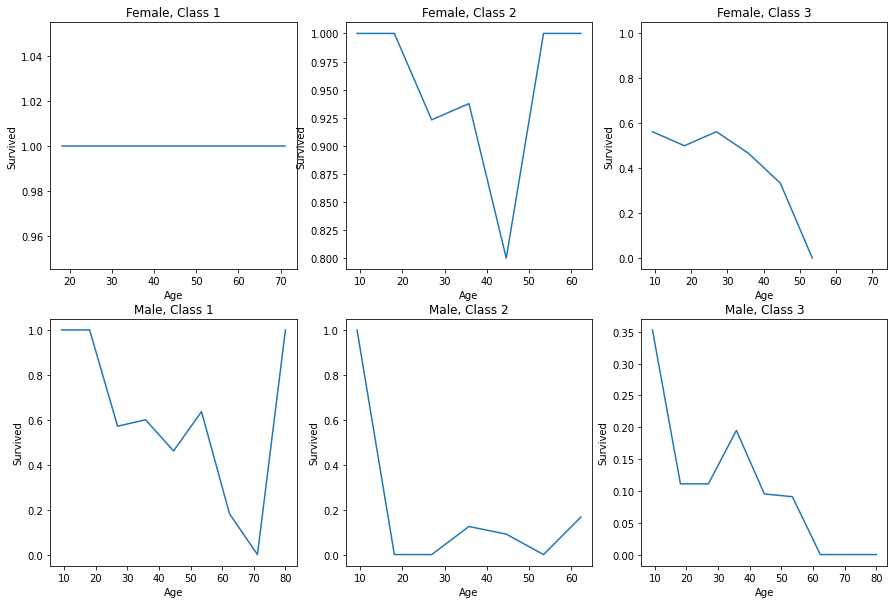

In [124]:
fig, axs = plt.subplots(2, 3, figsize=(15,10))

for i, sex in enumerate(["female", "male"]):
    for j, pclass in enumerate([1, 2, 3]):
        ax = axs[i, j]
        data = dh.train.query(f"Sex == {sex!r} and Pclass == {pclass!r}")
        binned = pd.cut(data["Age"], age_boundaries)
        surv_by_age = data.groupby(binned)["Survived"].mean()

        ax.plot(age_boundaries[1:], surv_by_age)
        ax.set_xlabel("Age")
        ax.set_ylabel("Survived")
        ax.set_title(f"{sex.capitalize()}, Class {pclass}")

plt.show()

Let's expand age quadratically.

In [125]:
dh2 = dh2.expand_polyonimially(["Age"], 2)
dh2.train.head()

,PassengerId,Survived,Name,IsFemale,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Pclass_1,Pclass_2,Pclass_3,Age,Age^2
763,764,1,"Carter, Mrs. William Ernest (Lucile Polk)",1.0,1.0,2.0,113760,120.000,B96 B98,S,1.0,0.0,0.0,36.0,1296.0
632,633,1,"Stahelin-Maeglin, Dr. Max",0.0,0.0,0.0,13214,30.500,B50,C,1.0,0.0,0.0,32.0,1024.0
237,238,1,"Collyer, Miss. Marjorie ""Lottie""",1.0,0.0,2.0,C.A. 31921,26.250,NaN,S,0.0,1.0,0.0,8.0,64.0
491,492,0,"Windelov, Mr. Einar",0.0,0.0,0.0,SOTON/OQ 3101317,7.250,NaN,S,0.0,0.0,1.0,21.0,441.0
590,591,0,"Rintamaki, Mr. Matti",0.0,0.0,0.0,STON/O 2. 3101273,7.125,NaN,S,0.0,0.0,1.0,35.0,1225.0


We'll train a logistic regressor on gender, socio-economic status and age.

In [126]:
features2 = ["IsFemale", "Pclass_1", "Pclass_2", "Pclass_3", "Age", "Age^2"]
X = dh2.train[features2]
y = dh2.train["Survived"]
model2 = make_pipeline(StandardScaler(), 
                       LogisticRegression(solver="liblinear"))
print(model2)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(solver='liblinear'))])


Use cross validation to pick the best value for `C`.

Best parameters:

{'logisticregression__C': 1.0}



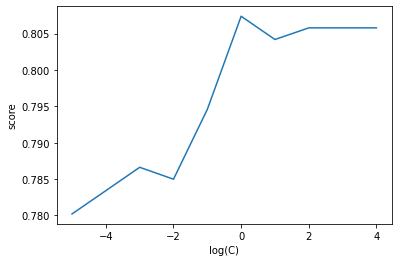

In [127]:
power_range = np.arange(-5,5)
tuned_parameters = [{"logisticregression__C": np.power(10.0, power_range)}]

clf = GridSearchCV(model2, tuned_parameters)
clf.fit(X, y)

results = pd.DataFrame(clf.cv_results_)

print("Best parameters:")
print()
print(clf.best_params_)
print()

fig, ax = plt.subplots()
ax.plot(power_range, results["mean_test_score"])
ax.set_xlabel("log(C)")
ax.set_ylabel("score")
plt.show()

Now train the model.

In [128]:
model2.set_params(**clf.best_params_)

model2.fit(X, y)

X_eval = dh2.eval[features2]
y_eval = dh2.eval["Survived"]

score_train = model2.score(X, y)
score_eval = model2.score(X_eval, y_eval)

print(f"Training score: {score_train:%}")
print(f"Evaluation score: {score_eval:%}")

Training score: 81.059390%
Evaluation score: 79.850746%


Not much better. Let's see how the weights of the two models compare.

In [129]:
pd.DataFrame(model1["logisticregression"].coef_, columns=features1)

,IsFemale,Pclass_1,Pclass_2,Pclass_3
0,0.137982,0.076938,0.016201,-0.07835


In [130]:
pd.DataFrame(model2["logisticregression"].coef_, columns=features2)

,IsFemale,Pclass_1,Pclass_2,Pclass_3,Age,Age^2
0,1.254333,0.653883,0.042737,-0.588084,-0.88559,0.424334


It seems that it is putting a fair bit of weight on the age columns, but that this isn't making much difference.

## Including Fare

Let's try including fare too. First let's check if fare depends on the port of embarking.

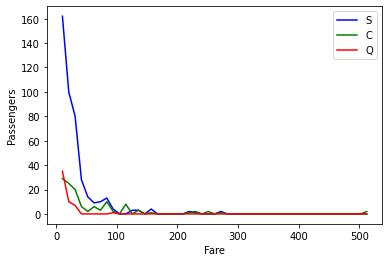

In [131]:
dh.full_train["Embarked"].value_counts(dropna=False)

num_fare_groups = 50
fare_min = dh.train["Fare"].min()
fare_max = dh.train["Fare"].max()
fare_boundaries = np.linspace(fare_min, fare_max, num_fare_groups)

embark_ports = "SCQ"
colours = "bgr"

fig, ax = plt.subplots()

for port, col in zip(embark_ports, colours):
    with_port = dh.train.query(f"Embarked=={port!r}")
    binned = pd.cut(with_port["Fare"], fare_boundaries)
    pass_by_fare = with_port.groupby(binned)["PassengerId"].count()
    ax.plot(fare_boundaries[1:], pass_by_fare, col, label=port)

ax.set_xlabel("Fare")
ax.set_ylabel("Passengers")
ax.legend()
plt.show()

Indeed the port of depart does affect things.

Create dummies for the 'Embarked' column.

In [132]:
dh3 = dh2.make_dummies(["Embarked"])
dh3.train.head()

,PassengerId,Survived,Name,IsFemale,SibSp,Parch,Ticket,Fare,Cabin,Pclass_1,Pclass_2,Pclass_3,Age,Age^2,Embarked_C,Embarked_Q,Embarked_S
763,764,1,"Carter, Mrs. William Ernest (Lucile Polk)",1.0,1.0,2.0,113760,120.000,B96 B98,1.0,0.0,0.0,36.0,1296.0,0,0,1
632,633,1,"Stahelin-Maeglin, Dr. Max",0.0,0.0,0.0,13214,30.500,B50,1.0,0.0,0.0,32.0,1024.0,1,0,0
237,238,1,"Collyer, Miss. Marjorie ""Lottie""",1.0,0.0,2.0,C.A. 31921,26.250,NaN,0.0,1.0,0.0,8.0,64.0,0,0,1
491,492,0,"Windelov, Mr. Einar",0.0,0.0,0.0,SOTON/OQ 3101317,7.250,NaN,0.0,0.0,1.0,21.0,441.0,0,0,1
590,591,0,"Rintamaki, Mr. Matti",0.0,0.0,0.0,STON/O 2. 3101273,7.125,NaN,0.0,0.0,1.0,35.0,1225.0,0,0,1


This time we use a model with cross-validation built in, to simplify the code.

In [137]:
features3 = ["IsFemale", "Pclass_1", "Pclass_2", "Pclass_3", "Age", "Age^2", "Fare", "Embarked_C", "Embarked_Q", "Embarked_S"]
X = dh3.train[features3]
y = dh3.train["Survived"]
model3 = make_pipeline(StandardScaler(), 
                       LogisticRegressionCV(solver="liblinear", 
                                            cv=KFold()))
print(model3)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregressioncv',
                 LogisticRegressionCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
                                      solver='liblinear'))])


Train the model, and output the train and eval scores.

In [138]:
model3.fit(X, y)

X_eval = dh3.eval[features3]
y_eval = dh3.eval["Survived"]

score_train = model3.score(X, y)
score_eval = model3.score(X_eval, y_eval)

print(f"Training score: {score_train:%}")
print(f"Evaluation score: {score_eval:%}")

Training score: 79.935795%
Evaluation score: 79.850746%


## Comparing to just looking at gender

How do the models above compare to the one in which we assume only the women survived?

In [140]:
query = "(Sex=='female' and Survived==1) or (Sex=='male' and Survived==0)"
score_train = len(dh.train.query(query)) / len(dh.train)
score_eval = len(dh.eval.query(query)) / len(dh.eval)

print(f"Training score: {score_train:%}")
print(f"Evaluation score: {score_eval:%}")

Training score: 78.170144%
Evaluation score: 79.850746%


Not much better!